In [9]:
import pandas as pd

# Read in data
df = pd.read_csv('Resources/Myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [23]:
# remove target column, save labels

labels = df["MYOPIC"]
df = df.drop('MYOPIC', axis=1)

In [7]:
# standardize data set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)
X.shape

(618, 14)

In [13]:
# dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print("4 fewer features")

(618, 10)
4 fewer features


In [16]:
# t-SNE reduce to two features
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(X_pca)
tsne_features.shape

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

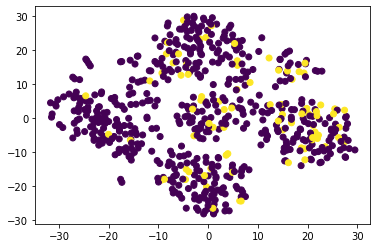

In [25]:
# t-SNE scatter plot 
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1],c = labels)
plt.show()

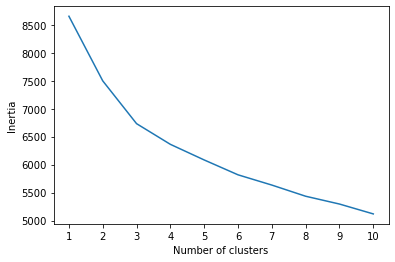

In [27]:
# k means cluster analysis
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# elbow analysis
# It appears there is an elbow where k = 3 clusters. Therefore the data should be able to be clustered into 3 groups.